In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [2]:
df_super=pd.read_csv('CarPrice_Assignment.csv')
df_super

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df_super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df_super.drop(columns='car_ID',inplace=True)
df_super[df_super.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [5]:
df_super.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df_super['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [7]:
#IQR Of price
Q1,Q3 = df_super['price'].quantile([0.25,0.75])
print("25 percentile:",Q1,"\n75 percentile:",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR 
print("Lower whisker price =",lower_whisker,"Upper whisker price =",upper_whisker)
df_super_new=df_super[df_super['price']<=upper_whisker]
df_super_new

25 percentile: 7788.0 
75 percentile: 16503.0
IQR= 8715.0
Lower whisker price = -5284.5 Upper whisker price = 29575.5


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<Axes: xlabel='price'>

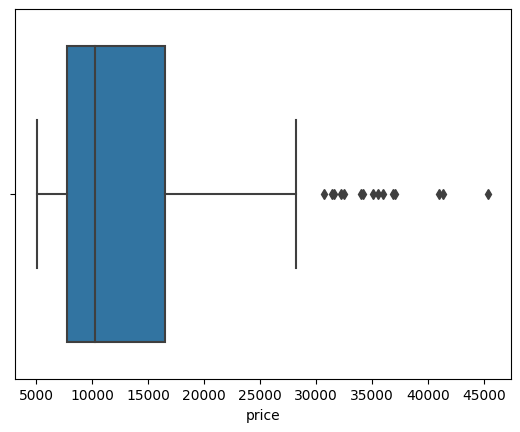

In [8]:
sns.boxplot(x=df_super['price'])

In [41]:
df_super_new.drop(columns='enginelocation',inplace=True)

C:\Users\Preethi\AppData\Local\Temp\ipykernel_28124\3195129642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_super_new.drop(columns='enginelocation',inplace=True)


In [9]:
df_super_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         190 non-null    int64  
 1   CarName           190 non-null    object 
 2   fueltype          190 non-null    object 
 3   aspiration        190 non-null    object 
 4   doornumber        190 non-null    object 
 5   carbody           190 non-null    object 
 6   drivewheel        190 non-null    object 
 7   enginelocation    190 non-null    object 
 8   wheelbase         190 non-null    float64
 9   carlength         190 non-null    float64
 10  carwidth          190 non-null    float64
 11  carheight         190 non-null    float64
 12  curbweight        190 non-null    int64  
 13  enginetype        190 non-null    object 
 14  cylindernumber    190 non-null    object 
 15  enginesize        190 non-null    int64  
 16  fuelsystem        190 non-null    object 
 17  bo

In [10]:
print("fuel type:",df_super_new['fueltype'].unique())
print("aspiration:",df_super_new['aspiration'].unique())
print("doornumber:",df_super_new['doornumber'].unique())
print("carbody:",df_super_new['carbody'].unique())
print("enginetype:",df_super_new['enginetype'].unique())
print("cylindernumber:",df_super_new['cylindernumber'].unique())
print("fuelsystem:",df_super_new['fuelsystem'].unique())

fuel type: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
cylindernumber: ['four' 'six' 'five' 'three' 'two']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


### Data Preprocessing

In [39]:
#Label encoding
label_encoder = LabelEncoder()
label_encoder = LabelEncoder()
for i in df_super_new[["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","fuelsystem","enginetype","cylindernumber"]]:
    df_super_new[i] = label_encoder.fit_transform(df_super_new[i])
df_super_new

C:\Users\Preethi\AppData\Local\Temp\ipykernel_28124\1612485960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_super_new[i] = label_encoder.fit_transform(df_super_new[i])
C:\Users\Preethi\AppData\Local\Temp\ipykernel_28124\1612485960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_super_new[i] = label_encoder.fit_transform(df_super_new[i])
C:\Users\Preethi\AppData\Local\Temp\ipykernel_28124\1612485960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,front,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,front,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,front,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,front,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,front,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,126,1,0,0,3,2,front,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,125,1,1,0,3,2,front,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,127,1,0,0,3,2,front,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,129,0,1,0,3,2,front,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [43]:
corr_columns=[]
for i in df_super_new.columns:
    corr2=df_super_new[[i,'price']].corr()
    print(i,corr2.iloc[0][1].round(1))
    if abs(corr2.iloc[0][1])>0.5:
         corr_columns.append(i)
print("Correlated columns : ",corr_columns)
df_corr=df_super_new[corr_columns]
df_corr

symboling -0.1
CarName -0.1
fueltype -0.2
aspiration 0.4
doornumber -0.1
carbody 0.1
drivewheel 0.5
wheelbase 0.7
carlength 0.7
carwidth 0.8
carheight 0.3
curbweight 0.9
enginetype -0.0
cylindernumber 0.0
enginesize 0.7
fuelsystem 0.6
boreratio 0.5
stroke 0.1
compressionratio 0.2
horsepower 0.7
peakrpm -0.1
citympg -0.7
highwaympg -0.7
price 1.0
Correlated columns :  ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg', 'price']


,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,2,88.6,168.8,64.1,2548,130,5,111,21,27,13495.0
1,2,88.6,168.8,64.1,2548,130,5,111,21,27,16500.0
2,2,94.5,171.2,65.5,2823,152,5,154,19,26,16500.0
3,1,99.8,176.6,66.2,2337,109,5,102,24,30,13950.0
4,0,99.4,176.6,66.4,2824,136,5,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,2,109.1,188.8,68.9,2952,141,5,114,23,28,16845.0
201,2,109.1,188.8,68.8,3049,141,5,160,19,25,19045.0
202,2,109.1,188.8,68.9,3012,173,5,134,18,23,21485.0
203,2,109.1,188.8,68.9,3217,145,3,106,26,27,22470.0


### scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_corr)
scaled_data = scaler.transform(df_corr)
print(scaled_data.round(2))
df_corr[corr_columns]=scaled_data.round(2)
df_corr

[[1.   0.07 0.48 ... 0.15 0.21 0.36]
 [1.   0.07 0.48 ... 0.15 0.21 0.49]
 [1.   0.29 0.52 ... 0.09 0.18 0.49]
 ...
 [1.   0.82 0.83 ... 0.06 0.09 0.71]
 [1.   0.82 0.83 ... 0.3  0.21 0.75]
 [1.   0.82 0.83 ... 0.09 0.15 0.76]]


C:\Users\Preethi\AppData\Local\Temp\ipykernel_28124\1951413460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[corr_columns]=scaled_data.round(2)


,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,1.0,0.07,0.48,0.34,0.47,0.57,0.71,0.41,0.15,0.21,0.36
1,1.0,0.07,0.48,0.34,0.47,0.57,0.71,0.41,0.15,0.21,0.49
2,1.0,0.29,0.52,0.47,0.59,0.75,0.71,0.70,0.09,0.18,0.49
3,0.5,0.48,0.61,0.53,0.38,0.39,0.71,0.36,0.24,0.29,0.38
4,0.0,0.46,0.61,0.55,0.59,0.61,0.71,0.44,0.06,0.06,0.53
...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,0.82,0.83,0.77,0.65,0.66,0.71,0.43,0.21,0.24,0.51
201,1.0,0.82,0.83,0.77,0.69,0.66,0.71,0.74,0.09,0.15,0.60
202,1.0,0.82,0.83,0.77,0.67,0.92,0.71,0.57,0.06,0.09,0.71
203,1.0,0.82,0.83,0.77,0.76,0.69,0.43,0.38,0.30,0.21,0.75


In [59]:
#splitting the dataset into training set and testing set

features = ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg']
X = df_corr[features]
Y = df_corr['price']
x_train,x_test,y_train,y_test,=train_test_split(X,Y,train_size=0.80)

In [61]:
##Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [62]:
reg.score(x_test,y_test)

0.6974825252510155

In [63]:

y_pred = reg.predict(x_train)
y_pred

array([ 0.21501931,  0.47790558,  0.1987055 ,  0.03652432,  0.30147961,
        0.1714911 ,  0.21648372,  0.04103495,  0.56466534,  0.23724141,
        0.07823537,  0.17867961,  0.05349221,  0.1052131 ,  0.05582764,
       -0.1360753 ,  0.48785252,  0.29644498,  0.45338815,  0.23724141,
        0.42673997,  0.53423571,  0.05809687,  0.58881188,  0.26095879,
        0.08275717,  0.22875301,  0.17649001,  0.04374952,  0.5611773 ,
        0.16236008,  0.13640449,  0.19159051,  0.50906258,  0.70317989,
        0.14214038,  0.13295445,  0.46885159,  0.4317746 ,  0.10080551,
        0.58877528,  0.57473459,  0.08077427,  0.52493728,  0.02910545,
        0.25979077,  0.29644498,  0.30328872,  0.53833184,  0.53536369,
        0.10935481,  0.23744418,  0.17702677,  0.0511042 ,  0.22339355,
        0.08779179,  0.23220679,  0.27682234,  0.5591028 ,  0.19159051,
        0.21792422,  0.33828573,  0.1755617 ,  0.1714911 ,  0.26295131,
        0.28689159,  0.08327   ,  0.61972722,  0.0511042 ,  0.14

In [65]:
mse=mean_squared_error(y_test,reg.predict(x_test))
mse


0.013929630814445973

In [67]:
x_test






,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg
58,1.0,0.32,0.48,0.49,0.45,0.16,0.71,0.57,0.00,0.09
201,1.0,0.82,0.83,0.77,0.69,0.66,0.71,0.74,0.09,0.15
147,0.5,0.38,0.56,0.46,0.43,0.39,0.71,0.30,0.27,0.32
99,0.5,0.38,0.56,0.44,0.37,0.48,0.14,0.32,0.33,0.41
196,1.0,0.64,0.83,0.62,0.64,0.66,0.71,0.43,0.24,0.24
150,0.5,0.33,0.30,0.30,0.22,0.25,0.14,0.09,0.58,0.56
204,1.0,0.82,0.83,0.77,0.70,0.66,0.71,0.43,0.09,0.15
134,0.5,0.45,0.79,0.56,0.54,0.49,0.71,0.41,0.15,0.24
34,0.5,0.26,0.15,0.33,0.21,0.25,0.00,0.18,0.42,0.41
189,0.5,0.29,0.31,0.35,0.34,0.39,0.71,0.28,0.24,0.26


In [68]:
y_test

58     0.46
201    0.60
147    0.22
99     0.17
196    0.47
150    0.01
204    0.76
134    0.43
34     0.09
189    0.28
102    0.40
113    0.50
29     0.34
19     0.05
117    0.56
5      0.44
69     1.00
164    0.13
143    0.21
180    0.46
157    0.09
144    0.18
130    0.18
122    0.11
169    0.21
123    0.16
186    0.15
4      0.53
170    0.26
45     0.16
79     0.11
38     0.17
30     0.06
178    0.49
195    0.36
121    0.07
109    0.32
1      0.49
Name: price, dtype: float64

In [69]:
reg.coef_

array([ 0.10865859,  0.20555998, -0.12889784,  0.25695699,  0.50346258,
       -0.03469607,  0.00649299,  0.29681498, -0.31835207,  0.37013434])

In [70]:
reg.intercept_

-0.26548217662055373

In [72]:
linear=reg.intercept_
for i in range(0,10):
    linear+=reg.coef_[i]*x_test.iloc[37][i]
linear

0.25619023816856235

In [73]:
print("Independent values X :\n",x_test.iloc[37])
print("Dependent value Y :",y_test.iloc[37])
print(" Predicted value by the model :",reg.predict([x_test.iloc[37]]))

Independent values X :
 drivewheel    1.00
wheelbase     0.07
carlength     0.48
carwidth      0.34
curbweight    0.47
enginesize    0.57
fuelsystem    0.71
horsepower    0.41
citympg       0.15
highwaympg    0.21
Name: 1, dtype: float64
Dependent value Y : 0.49
 Predicted value by the model : [0.25619024]


C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
#Random Forest model
SVModel = SVR() 
SVModel.fit(x_train, y_train) 
y_pred = SVModel.predict(x_test) 
print("Score :",SVModel.score(x_test,y_test))
print("The r2_score of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))
print("The Mean Absolute Error of our Model is {}".format(round(mean_absolute_error(y_test, y_pred), 2)))
print("The root mean squared Error of our Model is {}".format(round( np.sqrt(mean_absolute_error(y_test, y_pred)), 2)))

Score : 0.7957797459410182
The r2_score of our model is 80.0%
The Mean Absolute Error of our Model is 0.08
The root mean squared Error of our Model is 0.28


In [75]:
# KNN
KNNModel = KNeighborsRegressor(n_neighbors=3)
KNNModel.fit(x_train,y_train)
y_pr = KNNModel.predict(x_test)
print("Score :",KNNModel.score(x_test,y_test))
print("The r2_score of our model is {}%".format(round(r2_score(y_test, y_pr), 2) *100))
print("The Mean Absolute Error of our Model is {}".format(round(mean_absolute_error(y_test, y_pr), 2)))
print("The root mean squared Error of our Model is {}".format(round( np.sqrt(mean_absolute_error(y_test, y_pr)), 2)))

Score : 0.7661743620594575
The r2_score of our model is 77.0%
The Mean Absolute Error of our Model is 0.07
The root mean squared Error of our Model is 0.27


In [76]:
#Decision Tree
DTModel = DecisionTreeRegressor(random_state = 0)  
DTModel.fit(x_train, y_train) 

y_pred = DTModel.predict(x_test) 

DTModel.score(x_test,y_test)

print("Score :",DTModel.score(x_test,y_test))
print("The r2_score of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))
print("The Mean Absolute Error of our Model is {}".format(round(mean_absolute_error(y_test, y_pred), 2)))
print("The root mean squared Error of our Model is {}".format(round( np.sqrt(mean_absolute_error(y_test, y_pred)), 2)))

Score : 0.8016273123778013
The r2_score of our model is 80.0%
The Mean Absolute Error of our Model is 0.07
The root mean squared Error of our Model is 0.26


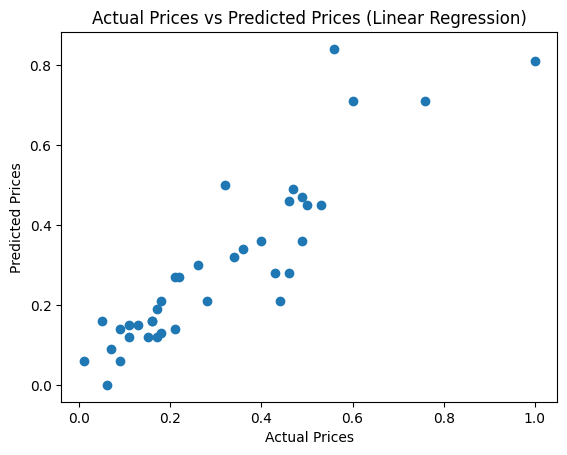

In [77]:
# Visualize the predicted vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (Linear Regression)')
plt.show()

NameError: name 'k_neighbors' is not defined

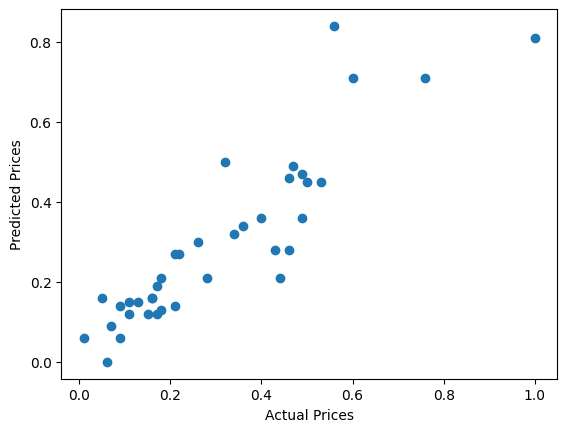

In [79]:
#Dimension Reductionality

## PCA

In [81]:
df_super_new

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,126,1,0,0,3,2,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,125,1,1,0,3,2,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,127,1,0,0,3,2,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,129,0,1,0,3,2,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [83]:
col=df_super_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_super_new)
scaled_data = scaler.transform(df_super_new)
df_super_new[col]=scaled_data.round(2)
df_super_new

C:\Users\Preethi\AppData\Local\Temp\ipykernel_28124\1074135133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_super_new[col]=scaled_data.round(2)


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,0.02,1.0,0.0,1.0,0.00,1.0,0.07,0.48,0.34,...,0.57,0.71,0.66,0.33,0.12,0.41,0.35,0.15,0.21,0.36
1,1.0,0.02,1.0,0.0,1.0,0.00,1.0,0.07,0.48,0.34,...,0.57,0.71,0.66,0.33,0.12,0.41,0.35,0.15,0.21,0.49
2,0.6,0.01,1.0,0.0,1.0,0.50,1.0,0.29,0.52,0.47,...,0.75,0.71,0.10,0.77,0.12,0.70,0.35,0.09,0.18,0.49
3,0.8,0.03,1.0,0.0,0.0,0.75,0.5,0.48,0.61,0.53,...,0.39,0.71,0.46,0.73,0.19,0.36,0.55,0.24,0.29,0.38
4,0.8,0.04,1.0,0.0,0.0,0.75,0.0,0.46,0.61,0.55,...,0.61,0.71,0.46,0.73,0.06,0.44,0.55,0.06,0.06,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.95,1.0,0.0,0.0,0.75,1.0,0.82,0.83,0.77,...,0.66,0.71,0.89,0.59,0.16,0.43,0.51,0.21,0.24,0.51
201,0.2,0.94,1.0,1.0,0.0,0.75,1.0,0.82,0.83,0.77,...,0.66,0.71,0.89,0.59,0.11,0.74,0.47,0.09,0.15,0.60
202,0.2,0.95,1.0,0.0,0.0,0.75,1.0,0.82,0.83,0.77,...,0.92,0.71,0.74,0.44,0.11,0.57,0.55,0.06,0.09,0.71
203,0.2,0.97,0.0,1.0,0.0,0.75,1.0,0.82,0.83,0.77,...,0.69,0.43,0.34,0.73,1.00,0.38,0.27,0.30,0.21,0.75


In [84]:
dn1=df_super_new.price
df_super_new.drop(columns='price',inplace=True)

C:\Users\Preethi\AppData\Local\Temp\ipykernel_28124\1885810814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_super_new.drop(columns='price',inplace=True)


In [86]:
for i in np.arange(0.50, 1, 0.05):
   
    pca = PCA(i)
    X_pca = pca.fit_transform(df_super_new)
    #print(X_pca)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=30)
    reg=LinearRegression()
    reg.fit(X_train_pca,y_train)
    pred=reg.predict(X_test_pca)
    print("Variance : {}% Shape : {} Score : {}".format(round(i*100,1),X_pca.shape,round(reg.score(X_test_pca,y_test)*100,2)))

Variance : 50.0% Shape : (190, 2) Score : 73.34
Variance : 55.0% Shape : (190, 3) Score : 72.11
Variance : 60.0% Shape : (190, 3) Score : 72.11
Variance : 65.0% Shape : (190, 3) Score : 72.11
Variance : 70.0% Shape : (190, 4) Score : 72.79
Variance : 75.0% Shape : (190, 5) Score : 69.15
Variance : 80.0% Shape : (190, 6) Score : 69.03
Variance : 85.0% Shape : (190, 8) Score : 65.95
Variance : 90.0% Shape : (190, 9) Score : 64.66
Variance : 95.0% Shape : (190, 12) Score : 69.04


In [102]:
for i in np.arange(1,24):
   
   results = []


for i in range(1, df_super_new.shape[1] + 1):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(df_super_new)
    
    
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=30)
    
    reg = LinearRegression()
    reg.fit(X_train_pca, y_train)
    
    # Store the results in a dictionary
    result_dict = {
        'n_components': i,
        'shape': X_test_pca.shape,
        'score': round(reg.score(X_test_pca, y_test) * 100, 2)
    }
    
    results.append(result_dict)
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

    n_components     shape  score
0              1   (38, 1)  13.37
1              2   (38, 2)  73.34
2              3   (38, 3)  72.11
3              4   (38, 4)  72.79
4              5   (38, 5)  69.15
5              6   (38, 6)  69.03
6              7   (38, 7)  67.33
7              8   (38, 8)  65.95
8              9   (38, 9)  64.66
9             10  (38, 10)  67.35
10            11  (38, 11)  67.14
11            12  (38, 12)  69.04
12            13  (38, 13)  66.09
13            14  (38, 14)  63.48
14            15  (38, 15)  63.04
15            16  (38, 16)  58.89
16            17  (38, 17)  57.33
17            18  (38, 18)  57.34
18            19  (38, 19)  57.59
19            20  (38, 20)  57.66
20            21  (38, 21)  57.42
21            22  (38, 22)  57.21
22            23  (38, 23)  62.56


In [103]:
max_score_row = results_df.loc[results_df['score'].idxmax()]
print("Maximum Score Details:")
print(max_score_row)

Maximum Score Details:
n_components          2
shape           (38, 2)
score             73.34
Name: 1, dtype: object
